<a href="https://colab.research.google.com/github/HammadN98/Curso_Estatistica/blob/main/S9CorrelacaoRegressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlacoes e Regressao

### Importacoes

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Correlacao

In [2]:
tamanho = np.array([30, 39, 49, 60])
preco = np.array([57000, 69000, 77000, 90000])

In [3]:
dataset = pd.DataFrame({'tamanho': tamanho, 'preco' : preco})
dataset

,tamanho,preco
0,30,57000
1,39,69000
2,49,77000
3,60,90000


In [4]:
media_tamanho = dataset['tamanho'].mean()
media_preco = dataset['preco'].mean()
media_tamanho, media_preco

(44.5, 73250.0)

In [5]:
dp_tamanho = dataset['tamanho'].std()
dp_preco = dataset['preco'].std()
dp_tamanho, dp_preco

(12.922847983320086, 13865.424623862047)

### Calculo manual Correlacao

In [6]:
dataset['dif'] = (dataset['tamanho'] - media_tamanho) * (dataset['preco'] - media_preco )
dataset

,tamanho,preco,dif
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [7]:
soma_dif = dataset['dif'].sum()
soma_dif

535500.0

In [8]:
covariancia = soma_dif / (len(dataset) -1)
covariancia

178500.0

In [9]:
coeficiente_correlacao = covariancia / (dp_tamanho * dp_preco)
coeficiente_correlacao

0.9962006267707775

<Axes: >

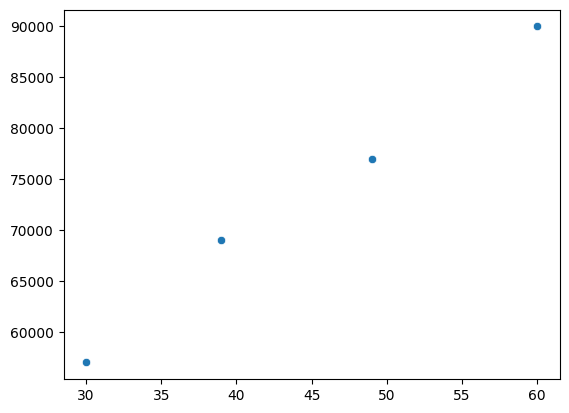

In [10]:
sns.scatterplot(x=tamanho, y=preco)

In [11]:
coeficiente_determinacao = math.pow(coeficiente_correlacao, 2)
coeficiente_determinacao

0.9924156887784898

### Correlacao com Numpy

In [12]:
np.cov(tamanho, preco)

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [13]:
dataset.cov()

,tamanho,preco,dif
tamanho,167.0,178500.0,1.850000e+05
preco,178500.0,192250000.0,1.612500e+08
dif,185000.0,161250000.0,1.735512e+10


In [14]:
np.corrcoef(tamanho, preco)

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [15]:
dataset.corr()

,tamanho,preco,dif
tamanho,1.000000,0.996201,0.108667
preco,0.996201,1.000000,0.088278
dif,0.108667,0.088278,1.000000


### Correlacao usando yellowbrick

In [16]:
!pip install yellowbrick


In [17]:
from yellowbrick.target import FeatureCorrelation

In [18]:
dataset = pd.read_csv("https://raw.githubusercontent.com/HammadN98/Curso_Estatistica/main/dados/house_prices.csv")
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [19]:
dataset.columns[3:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

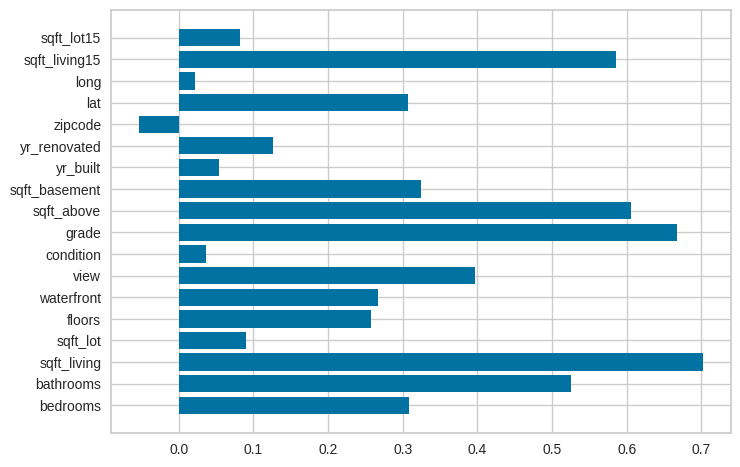

In [20]:
grafico = FeatureCorrelation(labels=dataset.columns[3:])
grafico.fit(dataset.iloc[:, 3:21].values, dataset.iloc[:,2].values);

In [21]:
dataset.iloc[:, 3:21].head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [22]:
dataset.iloc[:,2].head(3)

,price
0,221900.0
1,538000.0
2,180000.0


## Regressao

* Correlacao: Relacionamento entre variaveis, uma variavel afeta a outra. Duas vias: Correlacao de A x B = correlacao de B x A
* Regressao e uma via: Utilizar A para prever B != De utilizar B para prever A
* Espera-se que a correlacao seja de moderada a forte para obter um bom modelo(positiva ou negativa)
* Coeficiente de determinacao (R2): > 0.7 e um bom valor. Entra 0 e 0.3 e ruim. Entre esses valores e interresante fazer testes
* Regressao Linear: Existir Linearidade

In [23]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
dataset.drop(labels = ['id', 'date'], axis = 1, inplace=True)
dataset.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


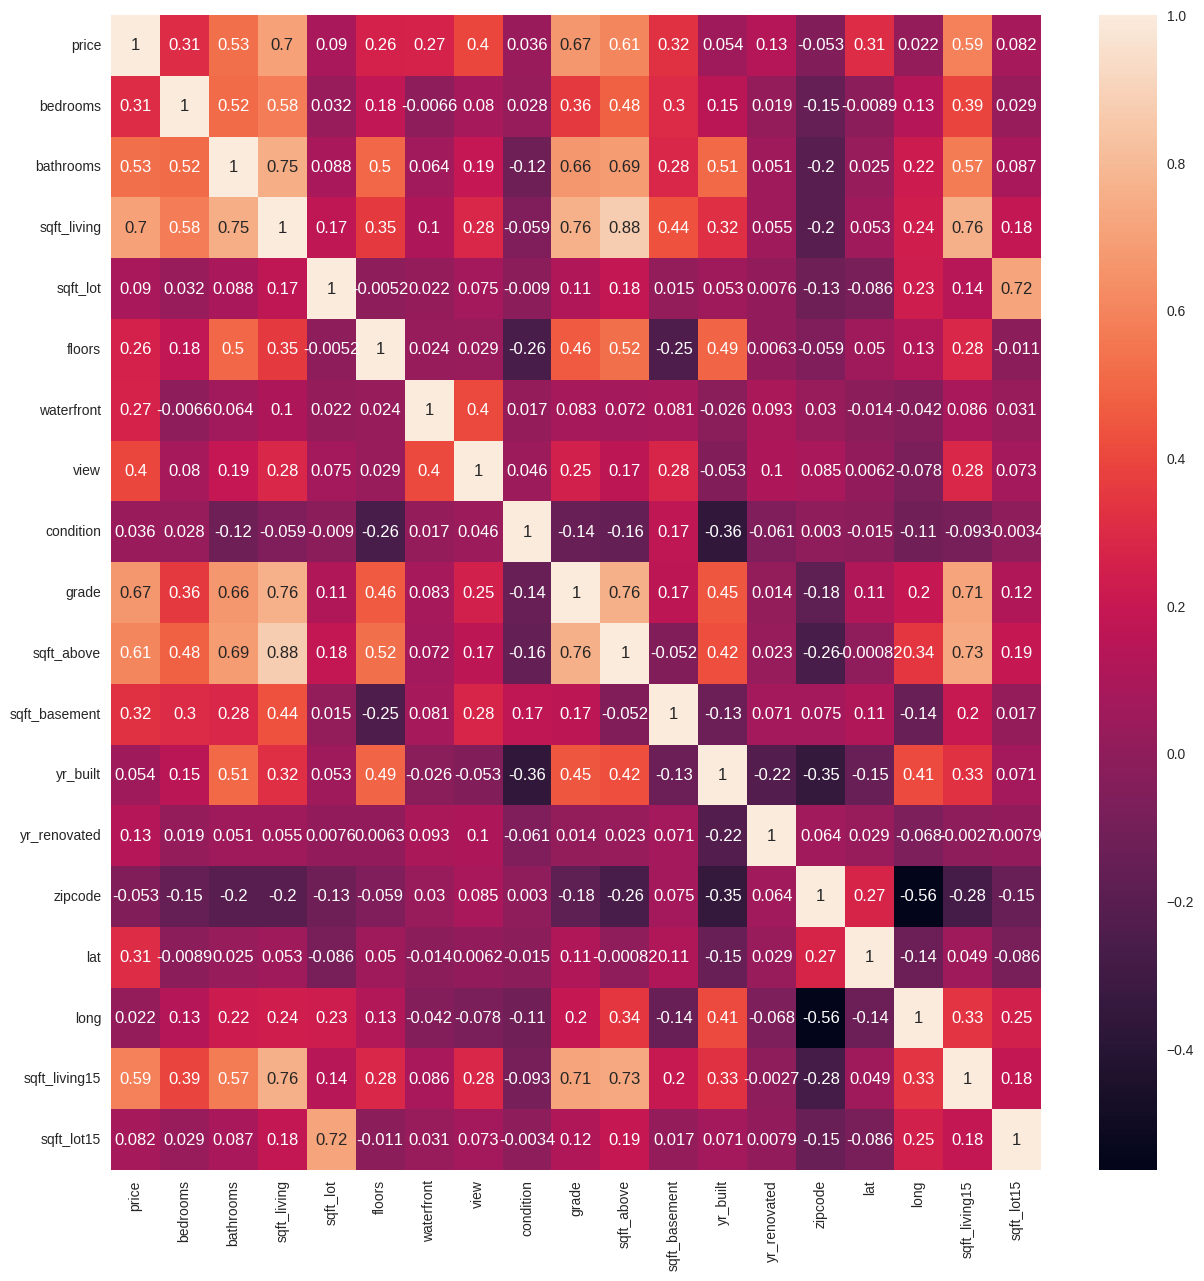

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(dataset.corr(), annot=True)

In [26]:
math.pow(0.7, 2)

0.48999999999999994

### Regressao Linear Simples

In [27]:
X = dataset['sqft_living'].values
print(X.shape)
X = X.reshape(-1, 1)
print(X.shape)


(21613,)
(21613, 1)


In [28]:
y = dataset['price'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((17290, 1), (4323, 1))

In [30]:
regressor = LinearRegression()
regressor.fit(X_train, y_train);

In [31]:
# b0
regressor.intercept_

-30186.361061054864

In [32]:
#b1
regressor.coef_

array([273.82181112])

In [33]:
regressor.intercept_ + regressor.coef_ * 900

array([216253.26894848])

In [34]:
regressor.predict(np.array([[900]]))

array([216253.26894848])

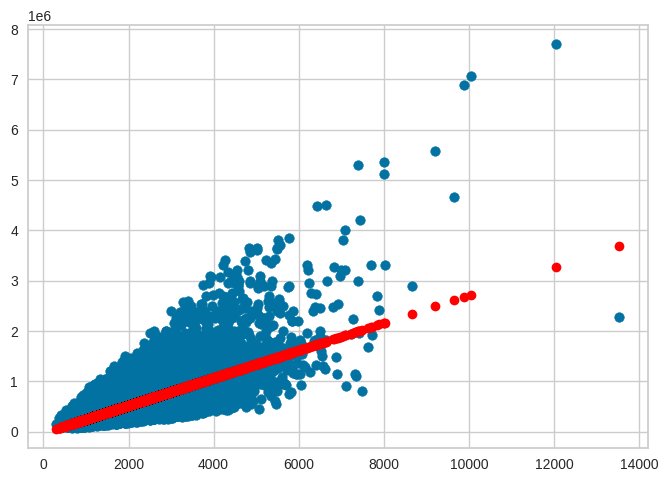

In [35]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), 'o', color='red')

In [36]:
regressor.score(X_train, y_train)

0.48876078213887486

In [37]:
regressor.score(X_test, y_test)

0.5033019006466926

## Metricas de Erro

In [38]:
previsoes = regressor.predict(X_test)
previsoes, y_test

(array([ 733776.4919685 ,  416143.19106732,  618771.33129738, ...,
         449001.80840193, 1412854.58355033,  380546.3556215 ]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [39]:
mean_absolute_error(y_test, previsoes)

178578.01159005202

In [40]:
mean_squared_error(y_test, previsoes)

85730574276.16481

In [41]:
math.sqrt(mean_squared_error(y_test, previsoes))

292797.8385783693

###Regressao Linear Multipla

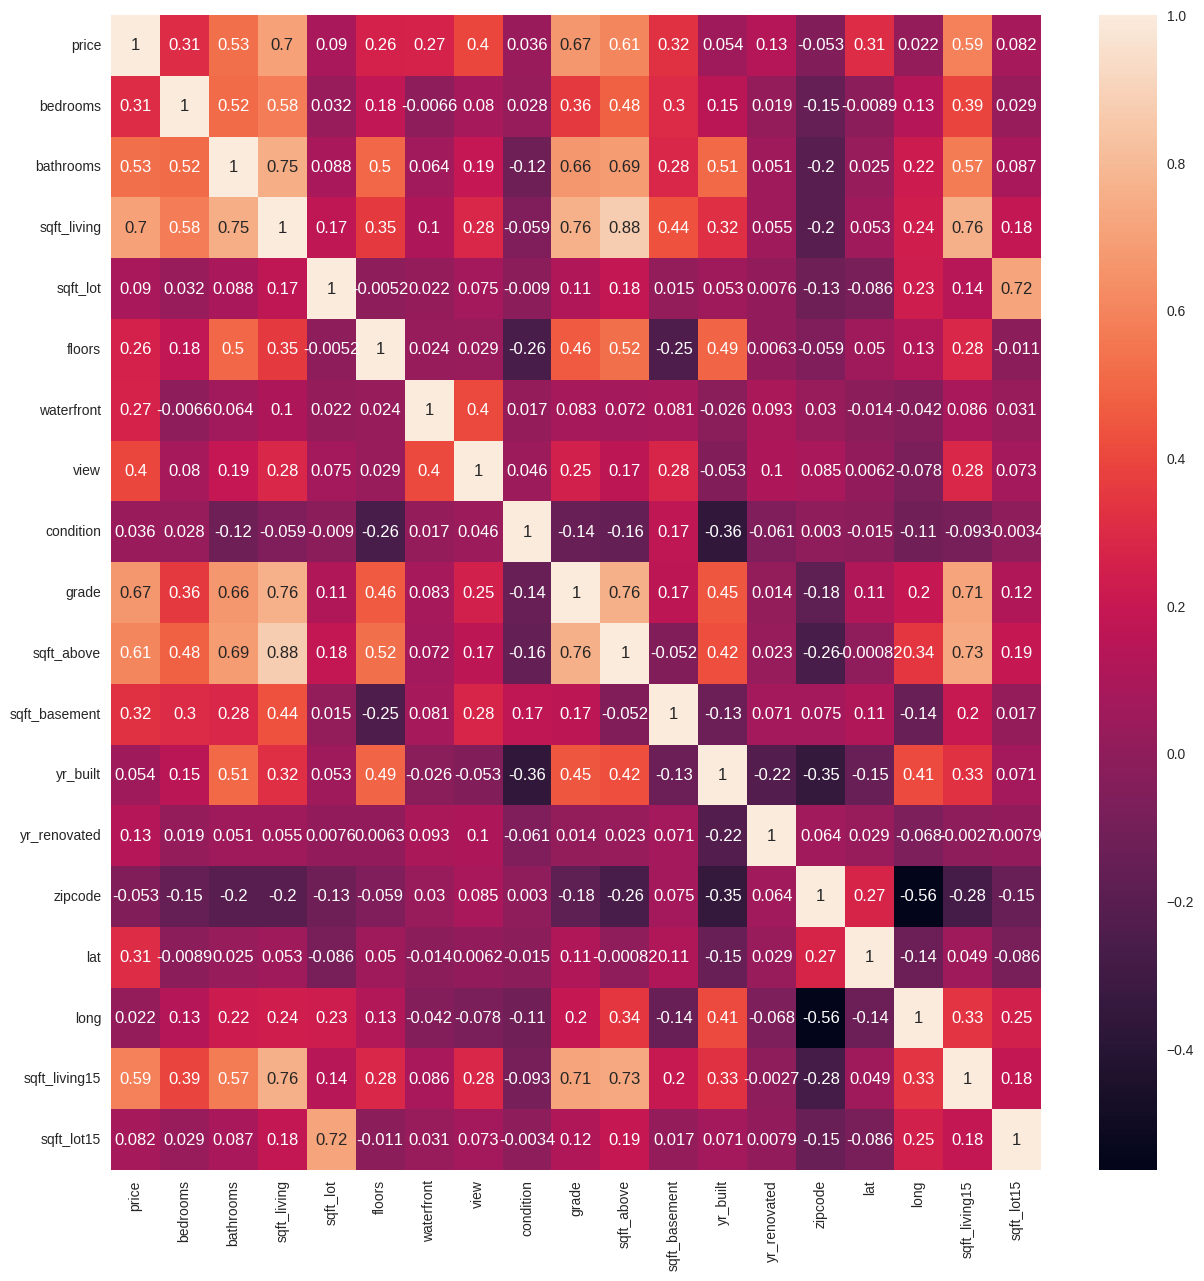

In [42]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(dataset.corr(), annot=True)

In [43]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
X = dataset.iloc[:, [2, 3, 9, 10]].values
X

array([[1.00e+00, 1.18e+03, 7.00e+00, 1.18e+03],
       [2.25e+00, 2.57e+03, 7.00e+00, 2.17e+03],
       [1.00e+00, 7.70e+02, 6.00e+00, 7.70e+02],
       ...,
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03],
       [2.50e+00, 1.60e+03, 8.00e+00, 1.60e+03],
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03]])

In [47]:
y = dataset.iloc[:, 0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

(array([2., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([   3. ,  198.7,  394.4,  590.1,  785.8,  981.5, 1177.2, 1372.9,
        1568.6, 1764.3, 1960. ]),
 <BarContainer object of 10 artists>)

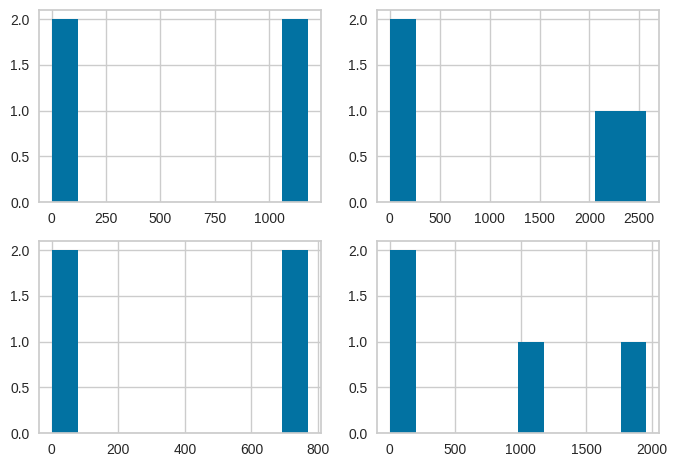

In [54]:
f, ax = plt.subplots(2, 2)
ax[0, 0].hist(X[0])
ax[0, 1].hist(X[1])
ax[1, 0].hist(X[2])
ax[1, 1].hist(X[3])



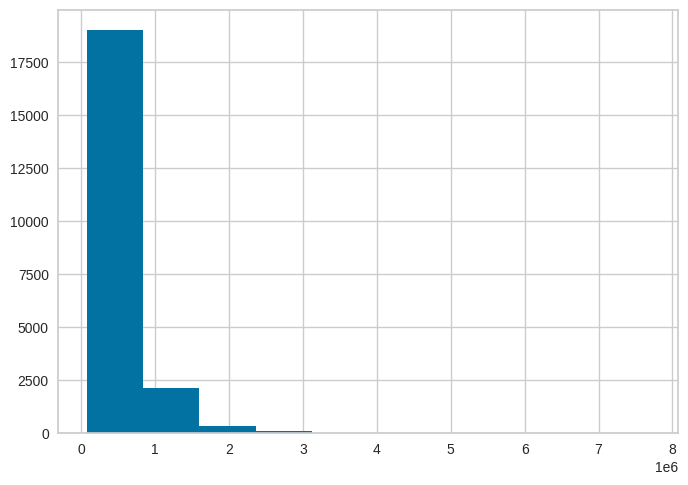

In [55]:
plt.hist(y);

(array([  50.,  283., 2287., 5912., 7239., 4313., 1110.,  340.,   70.,
           9.]),
 array([2.41816512, 2.45270801, 2.48725091, 2.5217938 , 2.5563367 ,
        2.59087959, 2.62542249, 2.65996539, 2.69450828, 2.72905118,
        2.76359407]),
 <BarContainer object of 10 artists>)

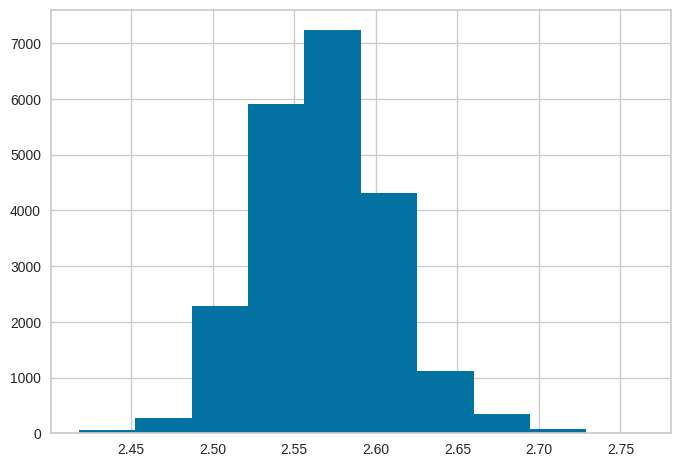

In [57]:
y = np.log(y)
plt.hist(y)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((17290, 4), (4323, 4))

In [63]:
regressor = LinearRegression()
regressor.fit(X_train, y_train);

In [64]:
regressor.score(X_train, y_train)

0.55218549707876

In [65]:
regressor.score(X_test, y_test)


0.5747407100751116

In [66]:
previsoes = regressor.predict(X_test)
mean_absolute_error(y_test, previsoes)

0.021243095306172508

Regressao linear funciona melhopr quando os dados estao normamente distribuidos